In [1]:
#imports
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the fmri data

fmri_data = torch.load('./../../Dataset/Data/hcpWM_sphere_15_sub3.save')
print(fmri_data[0]['pheno']['label'])


C:\Users\Alex\AppData\Local\Temp\ipykernel_36288\1054321806.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fmri_data = torch.load('./../../Dataset/Data/hcpWM_sphere_15_

0


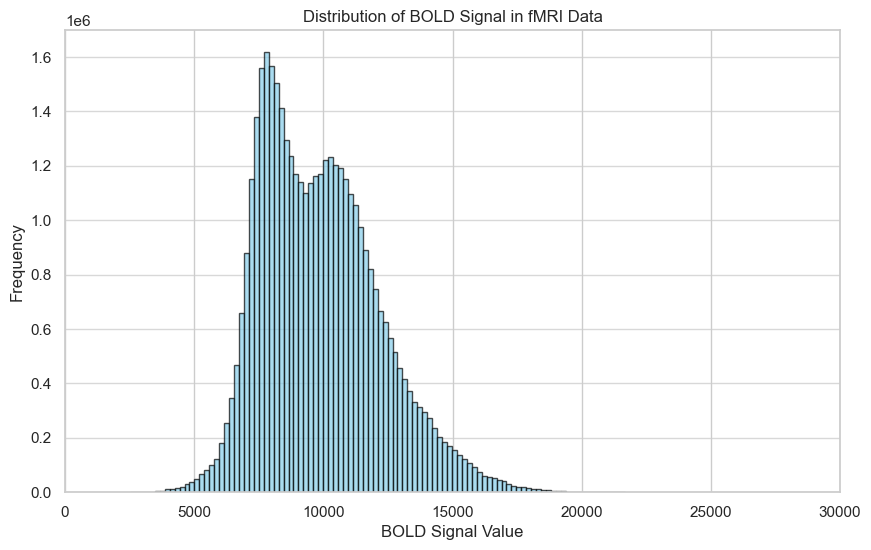

2516.9977242757845 21690.98228036674 9866.644152850498 2303.7090679325033


In [3]:
#get fmri BOLD signal overall distribution
#plot the distribution of the fmri data
sns.set(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook")
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.title("Distribution of BOLD Signal in fMRI Data")
plt.xlabel("BOLD Signal Value")
plt.ylabel("Frequency")

data = [x['roiTimeseries'] for x in fmri_data]
data = np.concatenate(data).flatten()
plt.hist(data, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlim(-0, 30000)

plt.grid(axis='y', alpha=0.75)

plt.show()

print(np.min(data), np.max(data), np.mean(data), np.std(data))
fmri_max = np.max(data)
fmri_min = np.min(data)


In [ ]:
from scipy.stats import zscore
#zscore the timeseries
# print(fmri_data[0]['roiTimeseries'][:, 0])
# for i in range(len(fmri_data)):
#     fmri_data[i]['roiTimeseries'] = zscore(fmri_data[i]['roiTimeseries'], axis=0)
# print(fmri_data[0]['roiTimeseries'][:, 0])

In [4]:
labels = []
for a in fmri_data:
    labels.append(a['pheno']['label'])

#count the number of labels
labels_count = {}
for label in labels:
    if label in labels_count:
        labels_count[label] += 1
    else:
        labels_count[label] = 1
print(labels_count)

{'0': 8691, '1': 8692}


In [5]:
sys.path.append('./../../Dataset/Prep/')
from fnirs_utils import *
#set the working directory
os.chdir('./../../')
#load the fnirs data
fnirs_data = load_fnirs_subject(3, 'nback', 'HbT')

# #zscore the fnirs data

# for i in range(len(fnirs_data)):
#     fnirs_data[i]['roiTimeseries'] = zscore(fnirs_data[i]['roiTimeseries'], axis=0)


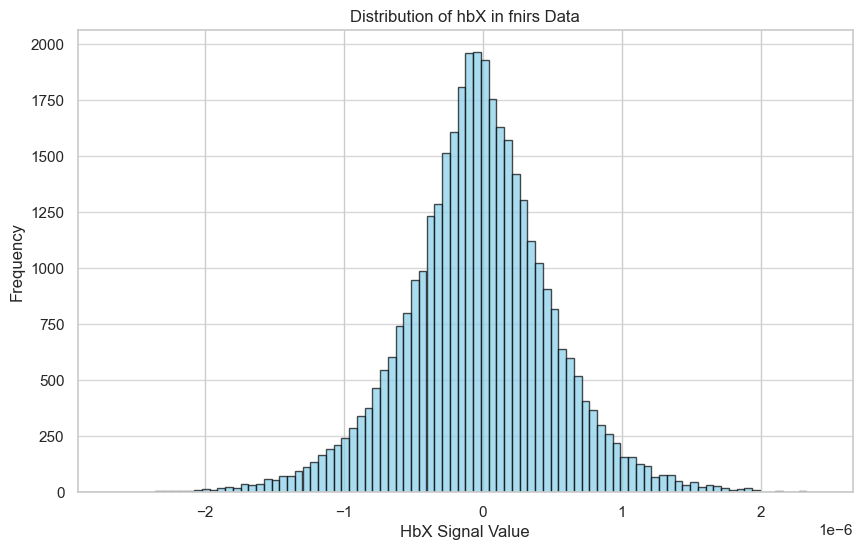

-2.91682671020127e-06 2.6619137831283327e-06 -3.7747342732266465e-08 5.340076693872708e-07


In [7]:
#get fnirs signal overall distribution
#plot the distribution of the fmri data
sns.set(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook")
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.title("Distribution of hbX in fnirs Data")
plt.xlabel("HbX Signal Value")
plt.ylabel("Frequency")

data = [x['roiTimeseries'] for x in fnirs_data]
data = np.concatenate(data).flatten()
fnirs_min = np.min(data)
fnirs_max = np.max(data)
plt.hist(data, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlim(fnirs_min, fnirs_max)

plt.grid(axis='y', alpha=0.75)

plt.show()

print(np.min(data), np.max(data), np.mean(data), np.std(data))


In [ ]:
#scale the fnirs data
def scale(data, min_val, max_val):
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    data = data * (max_val - min_val) + min_val
    return data

for i in range(len(fnirs_data)):
    fnirs_data[i]['roiTimeseries'] = scale(fnirs_data[i]['roiTimeseries'], fmri_min, fmri_max)

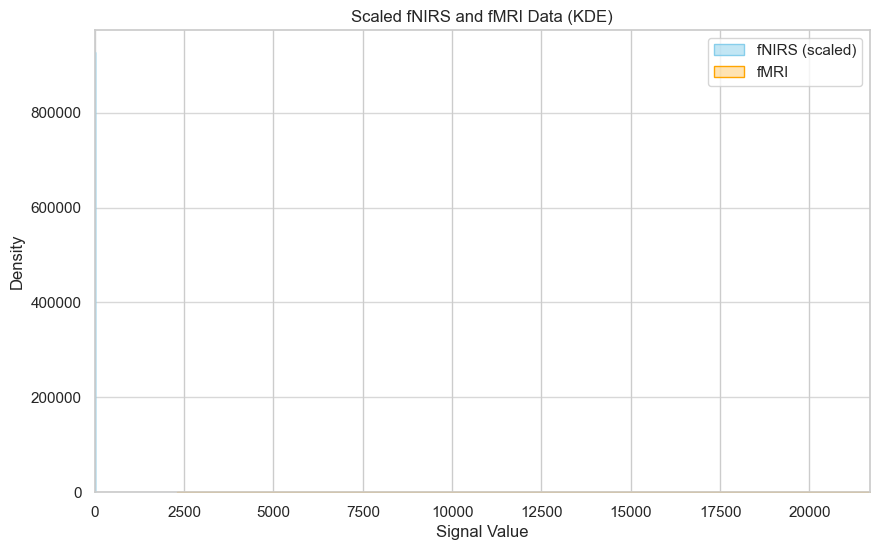

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten data
fnirs_data_flat = np.concatenate([x['roiTimeseries'] for x in fnirs_data]).flatten()
fmri_data_flat = np.concatenate([x['roiTimeseries'] for x in fmri_data]).flatten()

# Plotting
sns.set(style="whitegrid", palette="pastel", context="notebook")

plt.figure(figsize=(10, 6))
plt.title("Scaled fNIRS and fMRI Data (KDE)")
plt.xlabel("Signal Value")
plt.ylabel("Density")

# KDE for fNIRS
sns.kdeplot(fnirs_data_flat, bw_adjust=1.0, fill=True, color='skyblue', label='fNIRS (scaled)', alpha=0.5)

# KDE for fMRI
sns.kdeplot(fmri_data_flat, bw_adjust=1.0, fill=True, color='orange', label='fMRI', alpha=0.3)

# Add legend and grid
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.xlim(min(fmri_data_flat.min(), fnirs_data_flat.min()), max(fmri_data_flat.max(), fnirs_data_flat.max()))
plt.show()
plt.ylim(0, 1)


In [ ]:
# Split the fNIRS data by label
twoBack = [x['roiTimeseries'] for x in fnirs_data if x['pheno']['label'] == 1]
zeroBack = [x['roiTimeseries'] for x in fnirs_data if x['pheno']['label'] == 0]

# Split the fMRI data by label
fmri_data_2back = [x['roiTimeseries'][:34] for x in fmri_data if x['pheno']['label'] == '1']

fmri_data_0back = [x['roiTimeseries'][:34] for x in fmri_data if x['pheno']['label'] == '0' and x['roiTimeseries'].shape[0]!= 8 ]
for a  in fmri_data_0back:
    if a.shape[0] != 34:
        print(a.shape[0])

# Convert lists to numpy arrays for easier manipulation
twoBack = np.array(twoBack)
zeroBack = np.array(zeroBack)


fmri_data_2back = np.array(fmri_data_2back)
fmri_data_0back = np.array(fmri_data_0back)

#select 16 random samples from the fmri data
fmri_data_2back = fmri_data_2back[np.random.choice(fmri_data_2back.shape[0], 100, replace=False)]
fmri_data_0back = fmri_data_0back[np.random.choice(fmri_data_0back.shape[0], 100, replace=False)]
# Print the shapes of the resulting arrays
print("fNIRS Two-Back Shape:", twoBack.shape)
print("fNIRS Zero-Back Shape:", zeroBack.shape)
print("fMRI Two-Back Shape:", fmri_data_2back.shape)
print("fMRI Zero-Back Shape:", fmri_data_0back.shape)


In [ ]:
import numpy as np
from scipy.interpolate import interp1d

def downsample_to_fmri(fnirs_data, target_len=34):
    """
    Downsample fNIRS data from shape (N, 42, 68) to (N, 34, 68)
    """
    n_trials, original_len, n_features = fnirs_data.shape
    x_old = np.linspace(0, 1, original_len)
    x_new = np.linspace(0, 1, target_len)

    interpolated = interp1d(x_old, fnirs_data, axis=1, kind='linear')
    return interpolated(x_new)

# Assuming you have:
# fnirs_two_back.shape == (8, 42, 68)
# fnirs_zero_back.shape == (8, 42, 68)

fnirs_two_back_ds = downsample_to_fmri(twoBack)    # (8, 34, 68)
fnirs_zero_back_ds = downsample_to_fmri(zeroBack)  # (8, 34, 68)

# Print the shapes of the downsampled data
print("Downsampled fNIRS Two-Back Shape:", fnirs_two_back_ds.shape)  # Should be (8, 34, 68)
print("Downsampled fNIRS Zero-Back Shape:", fnirs_zero_back_ds.shape)  # Should be (8, 34, 68)


In [ ]:


# average_fmri_2back = np.mean(fmri_data_2back, axis=0)  # Average across the first dimension (trials)
# average_fmri_0back = np.mean(fmri_data_0back, axis=0)  # Average across the first dimension (trials)
# average_fnirs_2back = np.mean(fnirs_two_back_ds, axis=0)  # Average across the first dimension (trials)
# average_fnirs_0back = np.mean(fnirs_zero_back_ds, axis=0)  # Average across the first dimension (trials)

# # Print the shapes of the average data
# print("Average fMRI Two-Back Shape:", average_fmri_2back.shape)  # Should be (34, 68)
# print("Average fMRI Zero-Back Shape:", average_fmri_0back.shape)  # Should be (34, 68)
# print("Average fNIRS Two-Back Shape:", average_fnirs_2back.shape)  # Should be (34, 68)
# print("Average fNIRS Zero-Back Shape:", average_fnirs_0back.shape)  # Should be (34, 68)

#zscote the fmri data

fmri_2back = (fmri_data_2back - np.mean(fmri_data_2back)) / np.std(fmri_data_2back)
fmri_0back = (fmri_data_0back - np.mean(fmri_data_0back)) / np.std(fmri_data_0back)

fnirs_2back = (fnirs_two_back_ds - np.mean(fnirs_two_back_ds)) / np.std(fnirs_two_back_ds)
fnirs_0back = (fnirs_zero_back_ds - np.mean(fnirs_zero_back_ds)) / np.std(fnirs_zero_back_ds)

# Print the shapes of the zscored data
print("Zscored fMRI Two-Back Shape:", fmri_2back.shape)  # Should be (100, 34, 68)
print("Zscored fMRI Zero-Back Shape:", fmri_0back.shape)  # Should be (100, 34, 68)
print("Zscored fNIRS Two-Back Shape:", fnirs_2back.shape)  # Should be (8, 34, 68)
print("Zscored fNIRS Zero-Back Shape:", fnirs_0back.shape)  # Should be (8, 34, 68)

In [ ]:
correlations = np.zeros((fmri_2back.shape[0], fnirs_2back.shape[0], 68))
# Calculate the correlation between each pair of fNIRS and fMRI data
for i in range(fnirs_2back.shape[0]):
    for j in range(fmri_2back.shape[0]):
        for channel in range(68):
            corr = np.corrcoef(fnirs_2back[i][:, channel], fmri_2back[j][:, channel])[0, 1]
            correlations[ j,i, channel] = corr


In [ ]:
%matplotlib inline
# Calculate the mean correlation across all trials for each channel
mean_correlations = np.mean(correlations, axis=(0, 1))
#plot tbe mean correlations ween fNIRS and fMRI Two-Back as  a bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(1, 69), mean_correlations, color='blue')
plt.xlabel('Channel Number')
plt.ylabel('Mean Correlation')
plt.title('Mean Correlation between fNIRS and fMRI Two-Back')
plt.xticks(range(1, 69))
plt.grid(axis='y')
plt.show()



In [ ]:
%matplotlib inline
# Plot the first 5 channels of the average 2-back data for both fMRI and fNIRS
plt.figure(figsize=(15, 10))

# Plot fMRI data
plt.subplot(2, 1, 1)
plt.plot(average_fmri_2back[:, :5])
plt.title('Average fMRI Two-Back Data (First 5 Channels)')
plt.xlabel('Time')
plt.ylabel('Signal Intensity')
plt.legend([f'Channel {i}' for i in range(5)])
plt.grid(True)

# Plot fNIRS data
plt.subplot(2, 1, 2)
plt.plot(average_fnirs_2back[:, :5])
plt.title('Average fNIRS Two-Back Data (First 5 Channels)')
plt.xlabel('Time')
plt.ylabel('Signal Intensity')
plt.legend([f'Channel {i}' for i in range(5)])
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
correlation_list = []
for channel in range(68):
    correlation = np.corrcoef(average_fmri_2back[:, channel], average_fnirs_2back[:, channel])[0, 1]
    correlation_list.append(correlation)

# Print the correlation values for each channel
for i, corr in enumerate(correlation_list):
    print(f"Channel {i}: Correlation = {corr:.4f}")

# Plot the correlation values
plt.figure(figsize=(15, 5))
plt.bar(range(len(correlation_list)), correlation_list)
plt.title('Correlation between fMRI and fNIRS Two-Back Data')
plt.xlabel('Channel Number')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()